First order differential equations


Reference model
\begin{cases} y' = f(x,y) \\ y(0)= y_0\end{cases}

Example
Differential equation:

\begin{cases} y' = -{y^2\over x^2} \\ y(1)= {1\over 2}\end{cases}



​Analytical solution in Python (SymPy):



**Initialization and symbolic variables**

In [ ]:
# Symbolic library and its initialization
import sympy as sy

sy.init_printing()

# For function plot
from sympy.plotting import plot

# Some common variables
x = sy.symbols('x')

y = sy.Function('y')
y1 = sy.Derivative(y(x), x)

**General solution**

In [ ]:
# General solution

# Definition
eqdiff = y1 + (y(x)**2)/x**2

# Solution
sol = sy.dsolve(eqdiff, y(x))

# Print
sy.pprint(sol)

**Solution with the initial condition**

In [ ]:
# Solution with the given initial conditions
sol = sy.dsolve(eqdiff, y(x),ics={y(1): '1/2'})
sy.pprint(sol)


**Plot and svg**

In [ ]:
# Plotting

title = sy.latex(sol.rhs)
xtol = 1e-3
p1 = plot(sol.rhs, (x,-1,1/3-xtol), show=False, ylim=[-10,10], title=f"${title}$")
p2 = plot(sol.rhs, (x,1/3+xtol,1), show=False, ylim=[-10,10])
p1.extend(p2)
p1.show()

# Save in svg format
#p1.save("ode-1.svg")

**Plot using matplotlib**

In [ ]:
# plot using matplotlib
f = sy.lambdify(x, sol.rhs, 'numpy')

import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1, 1/3-xtol, num=100)
x2 = np.linspace(1/3+xtol, 2, num=100)

plt.plot(x1, f(x1), '-', c='C0')
plt.plot(x2, f(x2), '-', c='C0')
plt.ylim(-10,10)
plt.savefig("ode-1-mpl.svg")
plt.show()

**Numerical solution in Python (SciPy)**

Initialization and equation in the standard solver format

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model
def model(y, t):
    dydt = -y**2/t**2
    return dydt

**Numerical solution in a given interval**

In [ ]:
# Solution
t = np.linspace(1, 10, 1001)
y0 = 1/2
sol = odeint(model, y0, t)

print(sol)

**Plot and svg export**

In [ ]:
# plot
#plt.figure(figsize=(11,9))
plt.plot(t,sol, label="y")
plt.legend()

# Save in svg format
plt.savefig("ode_num-1.svg")
plt.show()

***ASSIGNMENT***

**QUESTION1:**
Solve the differential equation 
$y
′
=
2
t
(
25
−
y
)$
.

**QUESTION2:** Solve the initial value problem:
$d
y/
d
x
=
2
x
,
y
(
0
)
=
2$
.

**QUESTION3:**
Consider the equation of a freely falling object
$dv/
dt
= g – bv^2$
1. Solve the differential equation where Take $b = 1$ and $g = 10$
2. Plot $v$ vs $t$
3. Plot $b$ vs $t$ in different values of $b$, i.e $b = 1,$ $b = 2,$ $b = 3$, $b = -4$, and $b = -2$.

In [1]:
#Question 01
import sympy as sy
sy.init_printing()
from scipy.integrate import odeint

t = sy.Symbol('t')
y = sy.Function('y')
y1 = sy.Derivative(y(t), t)

equation = y1 - 2*t*(25 - y(t))
solution = sy.dsolve(equation, y(t))
print(solution)

Eq(y(t), C1*exp(-t**2) + 25)


In [2]:
#Question 02
import sympy as sy
sy.init_printing()
from scipy.integrate import odeint

x = sy.Symbol('x')
y = sy.Function('y')
y1 = sy.Derivative(y(x), x)
equation = y1 - 2*x
solution = sy.dsolve(equation, y(x), ics={y(0): 2})
print(solution)

Eq(y(x), x**2 + 2)


In [3]:
#Question 03
#Task 01
import sympy as sy
sy.init_printing()
from scipy.integrate import odeint

b = 1
g = 10

t = sy.Symbol('t')
v = sy.Function('v')
v1 = sy.Derivative(v(t), t)
equation = v1 - g + b*v(t)**2
solution = sy.dsolve(equation, v(t))
print(solution)

Eq(v(t), -sqrt(10)/tanh(C1 - sqrt(10)*t))


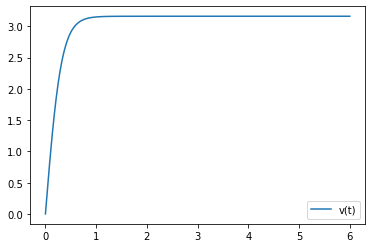

In [4]:
#Task 02
import sympy as sy
sy.init_printing()
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

b = 1
g = 10

def model(v, t):
    dvdt = g - b* v** 2
    return dvdt
t = np.linspace(0, 6, 1001)
sol = odeint(model, 0, t)
plt.plot(t, sol, label="v(t)")
plt.legend()
plt.show()

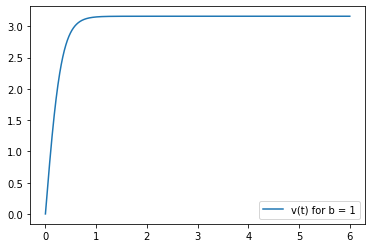

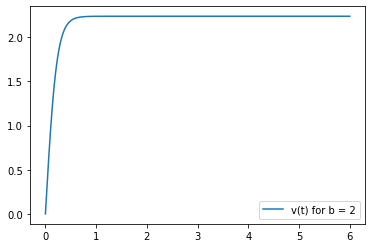

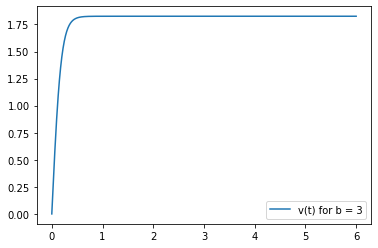

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


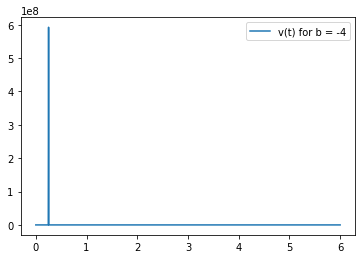

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


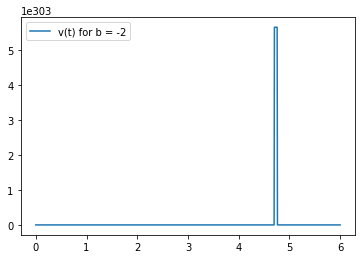

In [5]:
#Task 03
import sympy as sy
sy.init_printing()
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

g = 10
b_list = [1,2,3,-4,-2]
def model(v, t):
    dvdt = g - b*v**2
    return dvdt
for b in b_list:
    t = np.linspace(0, 6, 1001)
    sol = odeint(model, 0, t,Dfun =None)

    plt.plot(t, sol, label=f"v(t) for b = {b}")
    plt.legend()
    plt.show()
    print()